In [7]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## 1. Figure_1g ------

In [8]:
def load_signal_reference(f_reference):
    signal_references = {}
    
    o_h5 = h5py.File(f_reference)
    p_genes = list(o_h5.keys())

    for p_gene in p_genes:
        try:
            dset = o_h5[p_gene]
            signal_references[p_gene] = dset[:]
        except KeyError:
            pass
            
    return signal_references

In [9]:

f_reference = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/reference_of_ribosxitch_wt_v5-dedup.hdf5"
signal_references = load_signal_reference(f_reference)
ref_genes = list(signal_references.keys())

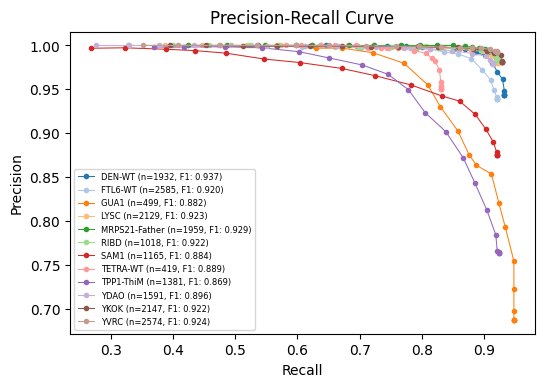

In [10]:
dir_out = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/"
df = pd.read_csv(dir_out+'DTW_against_minimap2_PR.txt',sep='\t') 

dict_PR = {}
for ref_gene in ref_genes:

    if ref_gene in ("HDV", "Hammerhead", "YPAA", "HAC1", "RPS12", "SCR1", "ADD-TRUNC", "RREmutA"):
        continue

    precisions = []
    recalls = []

    for threshold in range(20):

        df_threshold = df[df["diff"] >= threshold]
        df_subset = df_threshold[df_threshold.pred==ref_gene]

        precision = np.count_nonzero(df_subset.truth==df_subset.pred) / df_subset.shape[0]

        try:
            recall = np.count_nonzero(df_subset.truth==df_subset.pred)/df[df.truth==ref_gene].shape[0]
        except ZeroDivisionError:
            print(ref_gene)
            assert False

        #print(threshold, precision, df_threshold.shape[0], recall)

        precisions.append(precision)
        recalls.append(recall)

    dict_PR[ref_gene] = {"precision": precisions, "recall": recalls}


plt.figure(figsize=(6, 4), dpi=100)

counter = 0
for ref_gene in ref_genes:

    if ref_gene in ("HDV", "Hammerhead", "YPAA", "HAC1", "RPS12", "SCR1", "ADD-TRUNC", "RREmutA"):
        continue

    precisions = dict_PR[ref_gene]["precision"]
    recalls = dict_PR[ref_gene]["recall"]

    precisions = np.array(precisions)
    recalls = np.array(recalls)

    F1 = (2 * precisions * recalls)/(precisions + recalls)

    #plt.plot(recalls, precisions, "o-", ms=4, label="%s (n=%s, F1: %.1f%%)" % (ref_gene, df[df.truth==ref_gene].shape[0], F1[9-1]*100))
    plt.plot(recalls, precisions, "o-", ms=3, label="%s (n=%s, F1: %.3f)" % (ref_gene, df[df.truth==ref_gene].shape[0], F1[9]), linewidth=0.75, color=colors[counter])
    counter += 1

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(fontsize=6)

dir_out = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/"
plt.savefig(dir_out+'Fig1g_PR_curve_dtw_against_minimap2.pdf',bbox_inches='tight') 